# **Libraries and Dataset**

In [66]:
import numpy as np
import pandas as pd
import seaborn  as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [67]:
dataset = pd.read_csv('data/market_cluster.csv', encoding='latin1')


In [68]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Medium
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Medium
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High


In [69]:
dataset = pd.DataFrame(dataset)

In [70]:
dataset['Cluster'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [71]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
 11  profit_margin  9994 non-null   float64
 12  Cluster        9994 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.1+ KB


<AxesSubplot:xlabel='Cluster', ylabel='Count'>

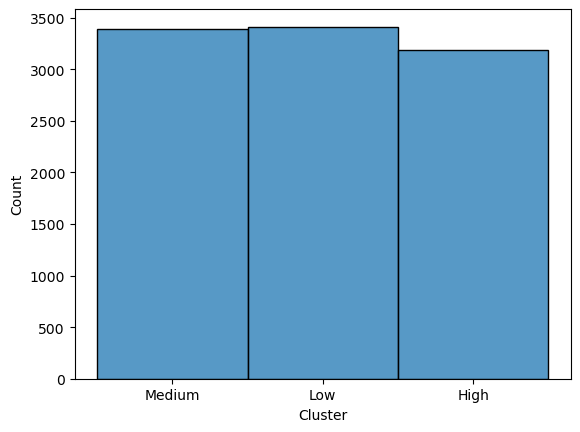

In [72]:
sns.histplot(dataset['Cluster'])

# **Preprocesing**

In [73]:
dataset.drop(['Order ID'], axis=1, inplace=True)
dataset.dropna(inplace=True)

In [74]:
def remove_outliers(data: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

dataset = remove_outliers(dataset, 'Discount')
dataset = remove_outliers(dataset, 'Sales')
dataset = remove_outliers(dataset, 'Profit')

<AxesSubplot:xlabel='Cluster', ylabel='Count'>

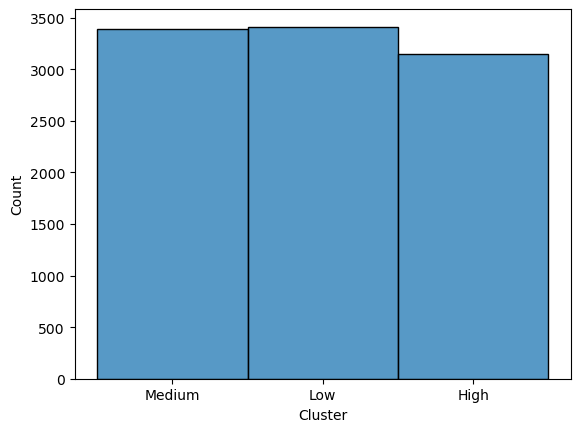

In [75]:
sns.histplot(dataset['Cluster'])

In [76]:
encoder = LabelEncoder()
scaler = StandardScaler()
onehot = OneHotEncoder()
minmaxscaler = MinMaxScaler()

In [77]:
dataset["Order Date"] = pd.to_datetime(dataset["Order Date"])
dataset["Order Date"] = dataset["Order Date"].dt.month

# dataset["Customer Name"] = onehot.fit_transform(dataset["Customer Name"].values.reshape(-1, 1)).toarray()
# dataset["Category"] = onehot.fit_transform(dataset["Category"].values.reshape(-1, 1)).toarray()
# dataset["City"] = onehot.fit_transform(dataset["City"].values.reshape(-1, 1)).toarray()
# dataset["Region"] = onehot.fit_transform(dataset["Region"].values.reshape(-1, 1)).toarray()
# dataset["State"] = onehot.fit_transform(dataset["State"].values.reshape(-1, 1)).toarray()
# dataset["Sub Category"] = onehot.fit_transform(dataset["Sub Category"].values.reshape(-1, 1)).toarray()

dataset["Customer Name"] = encoder.fit_transform(dataset["Customer Name"])
dataset["Category"] = encoder.fit_transform(dataset["Category"])
dataset["City"] = encoder.fit_transform(dataset["City"])
dataset["Region"] = encoder.fit_transform(dataset["Region"])
dataset["State"] = encoder.fit_transform(dataset["State"])
dataset["Sub Category"] = encoder.fit_transform(dataset["Sub Category"])

dataset["Order Date"] = encoder.fit_transform(dataset["Order Date"])

In [78]:
dataset[["Sales", "Discount", "profit_margin","Profit"]] = scaler.fit_transform(dataset[["Sales", "Discount", "profit_margin","Profit"]])

In [79]:
class_to_numeric = {'Low': 0, 'Medium': 1, 'High': 2}
dataset['Cluster'] = [class_to_numeric[label] for label in dataset['Cluster']]

In [80]:
dataset.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,12,5,14,21,10,2,-0.414559,-1.430908,0.124389,0,0.595874,1
1,37,1,13,8,10,3,-1.291968,-0.627370,-0.941183,0,-0.416872,1
2,14,3,0,13,5,4,1.507054,-0.225601,-0.875930,0,-1.514014,0
3,15,4,12,4,9,3,-1.036563,0.310092,-1.196262,0,-1.260827,0
4,28,3,18,12,9,3,1.498367,0.444015,2.315743,0,1.186643,2


# **Split Data**

In [82]:
X = dataset.drop(['Cluster','profit_margin','Sub Category','State'],axis=1)
y = dataset['Cluster']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

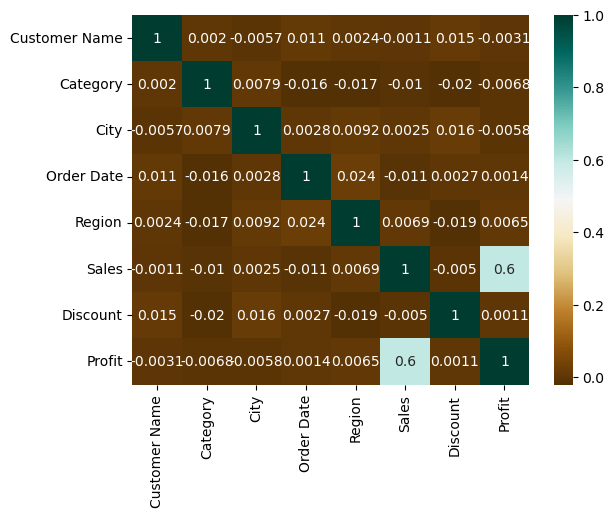

In [84]:
heatcol = X.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

In [85]:
# Dimension of Train and Test set
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Dimension of Train set (7960, 8)
Dimension of Test set (1991, 8) 

Number of numeric features: 8


# **SVM**

In [86]:
svm_model = SVC(kernel='linear', gamma=0.001, C=70)
svm_model.fit(X_train, y_train)

SVC(C=70, gamma=0.001, kernel='linear')

In [87]:
import joblib
joblib.dump(svm_model, 'model/svm_model.pkl')

['model/svm_model.pkl']

In [88]:
final_model = svm_model
y_pred = final_model.predict(X_test)

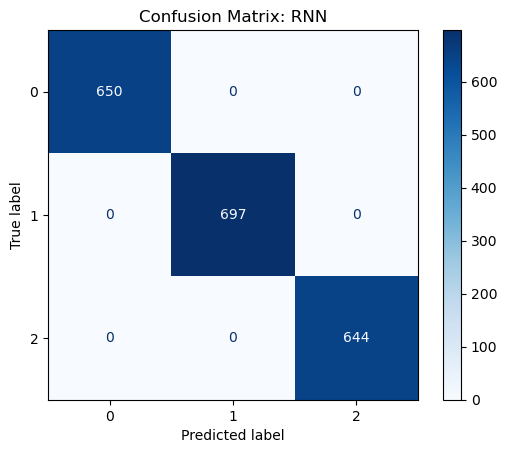

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       650
           1       1.00      1.00      1.00       697
           2       1.00      1.00      1.00       644

    accuracy                           1.00      1991
   macro avg       1.00      1.00      1.00      1991
weighted avg       1.00      1.00      1.00      1991



In [89]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: RNN")
plt.show()

print(classification_report(y_test,y_pred))